In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, librosa, urllib, IPython.display
import essentia, essentia.standard as ess
import numpy as np
import librosa.display
plt.rcParams['figure.figsize'] = (14,4)

In [2]:
song1 = 'In Flames - Behind Space 99 Anders Friden.mp3'
x, fs = librosa.load(song1)
#cut audio
cut_time = 15
x = x[:cut_time*fs]

print("Song 1: ")
print(song1)

song2 = 'In Flames - Behind Space Stanne Mikkels.mp3'
x2, fs2 = librosa.load(song2)
#cut audio
cut_time = 15
x2 = x2[:cut_time*fs2]

print("Song 2: ")
print(song2)

Song 1: 
In Flames - Behind Space 99 Anders Friden.mp3
Song 2: 
In Flames - Behind Space Stanne Mikkels.mp3


(663, 13)
(663, 13)


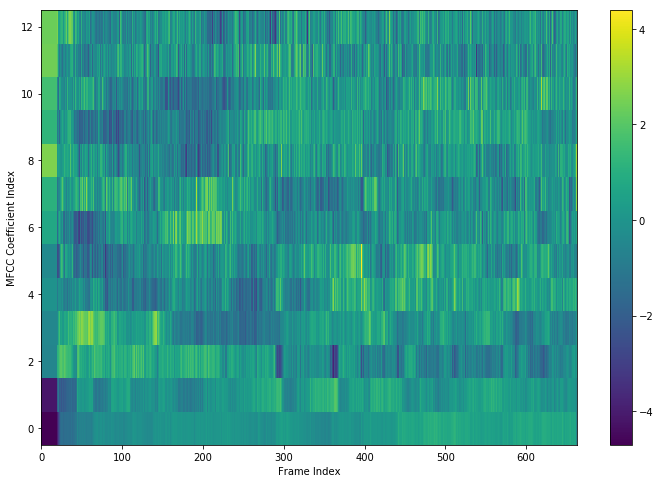

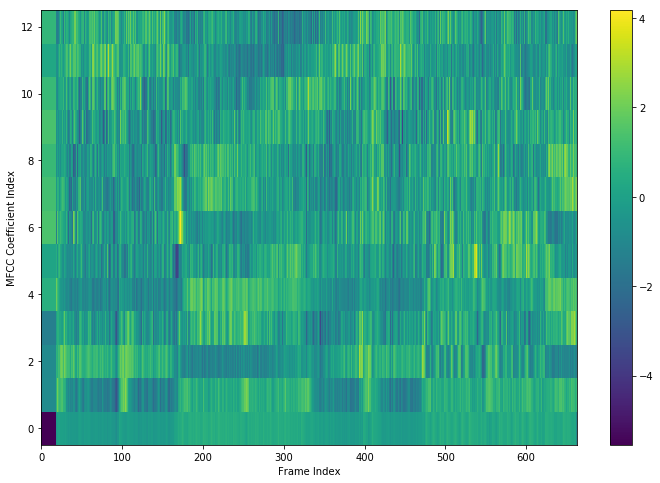

In [10]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

mfccs = sklearn.preprocessing.scale(mfccs)

plt.figure(figsize=(12, 8))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

#AUDIO2

hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x2, frameSize=frame_sz, hopSize=hop_sz)])
print mfccs.shape

mfccs = sklearn.preprocessing.scale(mfccs)

plt.figure(figsize=(12, 8))
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')
plt.colorbar()

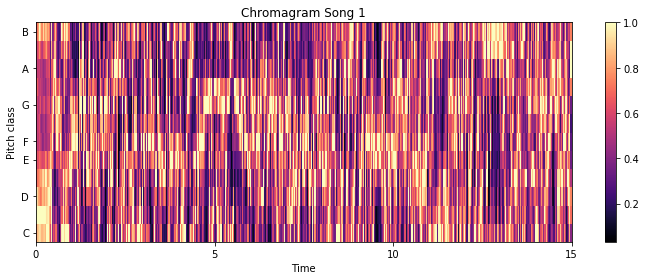

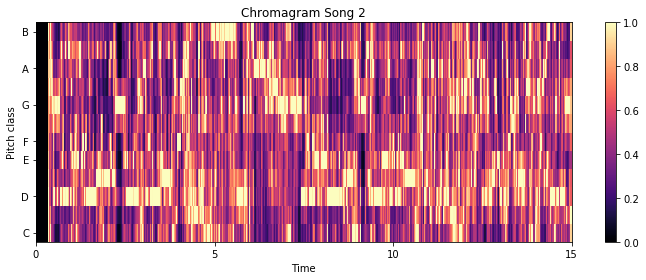

In [11]:
chroma = librosa.feature.chroma_stft(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram Song 1')
plt.tight_layout()

#AUDIO2

chroma = librosa.feature.chroma_stft(x2, fs2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram Song 2')
plt.tight_layout()

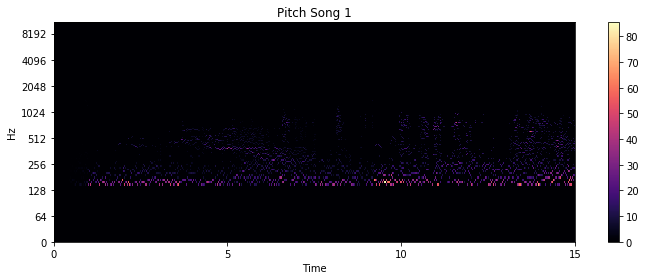

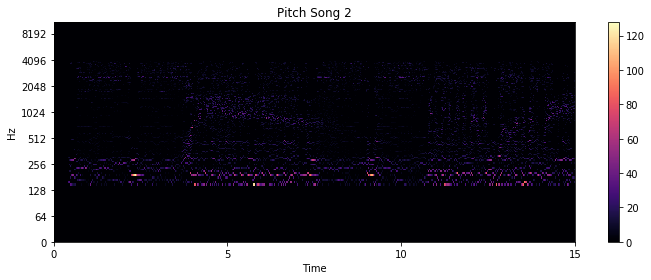

In [12]:
pitches, magnitudes = librosa.piptrack(x, fs)
plt.figure(figsize=(10, 4))
librosa.display.specshow(magnitudes, y_axis = 'log', x_axis='time')
plt.colorbar()
plt.title('Pitch Song 1')
plt.tight_layout()

#AUDIO2

pitches, magnitudes = librosa.piptrack(x2, fs2)
plt.figure(figsize=(10, 4))
librosa.display.specshow(magnitudes, y_axis = 'log', x_axis='time')
plt.colorbar()
plt.title('Pitch Song 2')
plt.tight_layout()

In [13]:
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)

#AUDIO2

tempo2, beats2 = librosa.beat.beat_track(x2, fs2)#
onset_env2 = librosa.onset.onset_strength(x2, fs2, aggregate=np.median)
tempo2, beats2 = librosa.beat.beat_track(onset_envelope=onset_env2, sr=fs2)


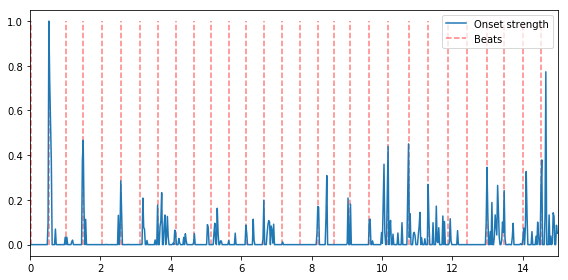

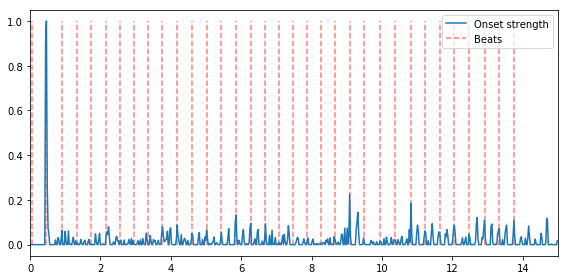

In [14]:
import matplotlib.pyplot as plt
hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env), label='Onset strength')
plt.vlines(times[beats], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a window
plt.xlim(0, cut_time)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

#AUDIO2

hop_length = 512
plt.figure(figsize=(8, 4))
times = librosa.frames_to_time(np.arange(len(onset_env2)), sr=fs2, hop_length=hop_length)
plt.plot(times, librosa.util.normalize(onset_env2), label='Onset strength')
plt.vlines(times[beats2], 0, 1, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.legend(frameon=True, framealpha=0.75)
# Limit the plot to a window
plt.xlim(0, cut_time)
plt.gca().xaxis.set_major_formatter(librosa.display.TimeFormatter())
plt.tight_layout()

12
646
646
12
6.993429788512175
12
646
646
12
6.594868600806316


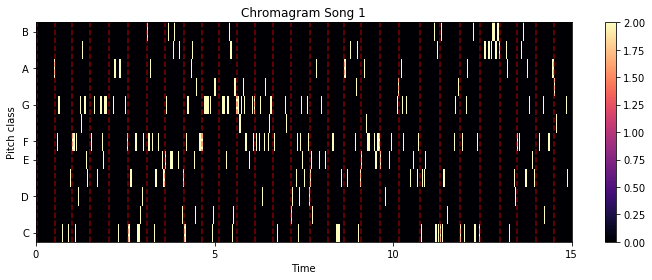

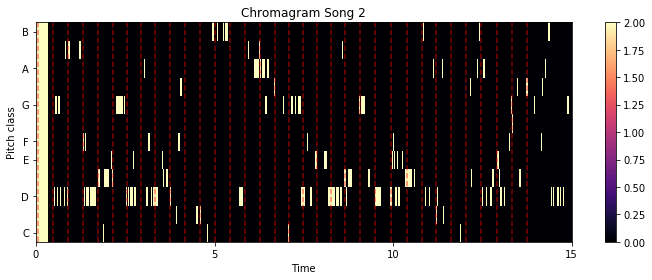

In [15]:
#beat synchronous
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)


chroma = librosa.feature.chroma_stft(x, fs)
threshold = 300
m, n = chroma.shape
print m
print n

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape
print m
print n

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram Song 1')
plt.tight_layout()

#AUDIO2

#beat synchronous
tempo, beats = librosa.beat.beat_track(x, fs)#
onset_env = librosa.onset.onset_strength(x, fs, aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=fs)
times = librosa.frames_to_time(np.arange(len(onset_env)), sr=fs, hop_length=hop_length)


chroma = librosa.feature.chroma_stft(x2, fs2)
threshold = 300
m, n = chroma.shape
print m
print n

avg = 0
chroma = chroma.transpose()
m, n = chroma.shape
print m
print n

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 

print(threshold)
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 2
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats2], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram Song 2')
plt.tight_layout()

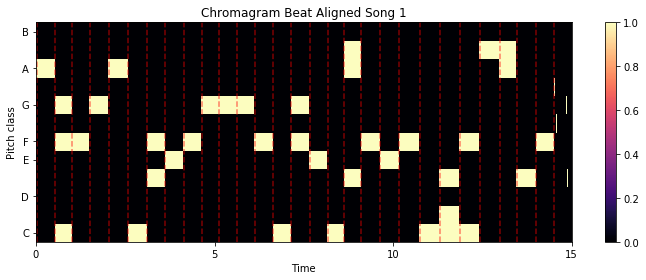

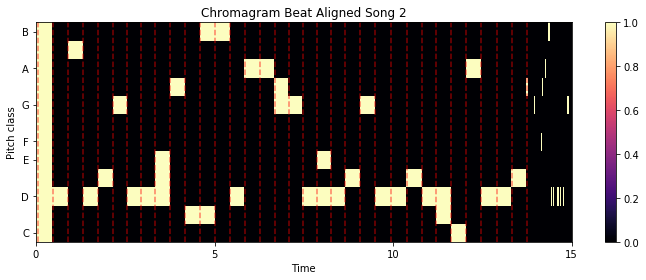

In [16]:
chroma = librosa.feature.chroma_stft(x, fs)
chroma = chroma.transpose()
m, n = chroma.shape
avg = 0

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 1
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram Beat Aligned Song 1')
plt.tight_layout()

#AUDIO2

chroma = librosa.feature.chroma_stft(x2, fs2)
chroma = chroma.transpose()
m, n = chroma.shape
avg = 0

for j in chroma:
    avg = avg + np.sum(j)
    
avg = avg / m
threshold = avg 
    
for i in chroma:
    if np.sum(i) < threshold:
        ind = np.where(i == np.max(i))
        i[ind] = 1
        low_values_flags = i < 1
        i[low_values_flags] = 0
    else:
        i.fill(0)     
        
chroma = chroma.transpose()        

prev_beat = 0
act_beat = 0
sum_key = np.zeros(12)

chroma = chroma.transpose()  

for i in beats2:
    act_beat = i
    sum_key = sum(chroma[prev_beat:act_beat])
    #print(sum_key)
    #print(chroma[prev_beat:act_beat])
    ind = np.where(sum_key == np.max(sum_key))
    #print("debug")
    fill = np.zeros(len(j))
    fill[ind] = 1
    chroma[prev_beat:act_beat] = fill
    #print(chroma[prev_beat:act_beat])
    prev_beat = i
    #print("BEAT")
    
chroma = chroma.transpose()  
    
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.vlines(times[beats2], 0, 12, alpha=0.5, color='r', linestyle='--', label='Beats')
plt.colorbar()
plt.title('Chromagram Beat Aligned Song 2')
plt.tight_layout()